<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Business Analytics
## Unsupervised Learning: K-means Clustering Code-Along Notebook

## Learning Objectives
In this code-along, we will learn about:

1. The fundamentals of unsupervised learning with K-means clustering in scikit-learn
2. Advanced Visualization Techniques
3. Methods for finding the best value for `K`

---


# K-means Clustering

To help us understand some applications of K-means clustering, we'll work with a dataset representing data on customers of a bank. For this problem we will assume we do not have a labeled targer variable but we want to know if customers fall into natural groups. The groups could be used for segmenting customers for a marketing campaing or for other analysis dictated by decision makers at the bank.

## Data Description
The data for this exercise comes from the publically avaialbe UCI datasets: [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing).


The website provides the following descriptions for the features:

    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


---



# Section 1: Setting up the Environment

## 1.1: Imports

In the next cell import the following modules:

>- `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
>- Use the common aliases for each of these

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2: Set Your Working Directory

In the next cell, set your working directory to your desired workspace for this lesson.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/BAIM4205'

## 1.3: Load Data

The customer bank data can be found in the following csv file. Download/move the file to your working directory.

>- [bank-full.csv](https://drive.google.com/file/d/1AHCEQkTn8DLx60MaNQ6lH4a0PkP_IRRC/view?usp=sharing)

In the next cell(s) check that the file is in your working directory then load it into a dataframe named, `bank_df`

In [ ]:
bank_df = pd.read_csv('bank-full.csv')

## 1.4: Check Records

In the next cell, show the first 5 records of `bank_df`.

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1.5: Show Columns

In the next cell, show the columns in the `bank_df`.

In [ ]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

# Section 2: Data Exploration

In this section we examine the data more closely.

## 2.1: Data Types

In the next cell, show the datatypes of all the columns in `bank_df`

In [ ]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

## 2.2: Continous Feature Descriptive Stats

In the next cell, show the summary statistics for all the continous features.

In [ ]:
round(bank_df.describe(),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


## 2.3: Categorical Feature Descriptive Stats

In the next cell, show the desriptive stats for the categorical features.

In [ ]:
bank_df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## 2.4: Exploring the Continous Features in More Depth

Note: while it's always important to get experts advice on problems so that we can understand the nuances of the data better, with unsupervised learning it's especially important because there is no target we can compare our results to.

However, if you don't have access to a domain expert, you will need to do your own exploring and over time develop your own expertise in the field.

For this exercise, we will perform some some exploratory analysis to gain practice.

### 2.4.1: Exploring `age`

In the next cell, replicate the chart given, here: [lesson12_2.4.1_age.png](https://drive.google.com/file/d/13ri5MNkBhNkHVz1uq9N2bxX3gleacAaF/view?usp=sharing) to start exploring the age of customers.

Some details and hints about the figure:

>- There are two Axes objects
>>- One for the histogram
>>- Another for the table of descriptive stats

To get the table data on the right of the figure:
1. Define the data
>- For this we can use `bank_df['age'].describe()`
>- Then covert that result to a DataFrame
2. Call the `table` method on `ax2`
>- See [matplotlib.axes.Axes.table doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.table.html)

In [ ]:
age_df = bank_df['age'].describe()

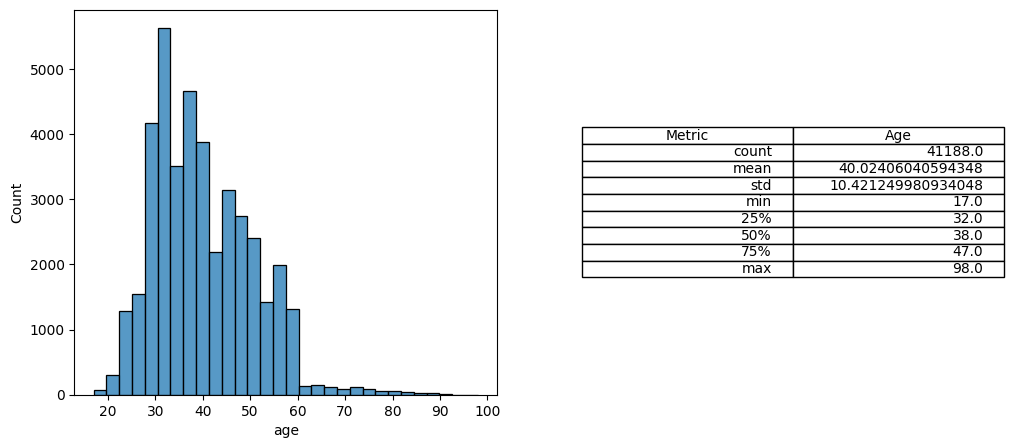

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize= (12,5))
age = bank_df['age']
age_desc = age.describe()
table_data = pd.DataFrame(age_desc).reset_index().rename(columns={'index': 'Metric', 'age': 'Age'})
sns.histplot(data = bank_df, x = 'age', ax=ax1,bins=30)
ax2.axis('off')
ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
plt.show()

Most people are around 30-40 years old that have been marketed to in the past.

### 2.4.2: More Age Exploring

Now let's see what the distributions are for age and loan.

Replicate the following chart: [Lesson12_2.4.2.png](https://drive.google.com/file/d/1-FAZkcRTrxpApkkqJJuHbPIxTib2Vmtt/view?usp=sharing)
>- The table is the result of grouping on the `loan` feature

In [ ]:
age_loan = bank_df[['age','loan']].groupby('loan').describe()
age_loan.transpose()

loan                 no     unknown          yes
age count  33950.000000  990.000000  6248.000000
    mean      40.058822   39.951515    39.846671
    std       10.432882   10.381776    10.363886
    min       17.000000   17.000000    17.000000
    25%       32.000000   32.000000    32.000000
    50%       38.000000   38.000000    38.000000
    75%       47.000000   47.000000    47.000000
    max       98.000000   86.000000    92.000000

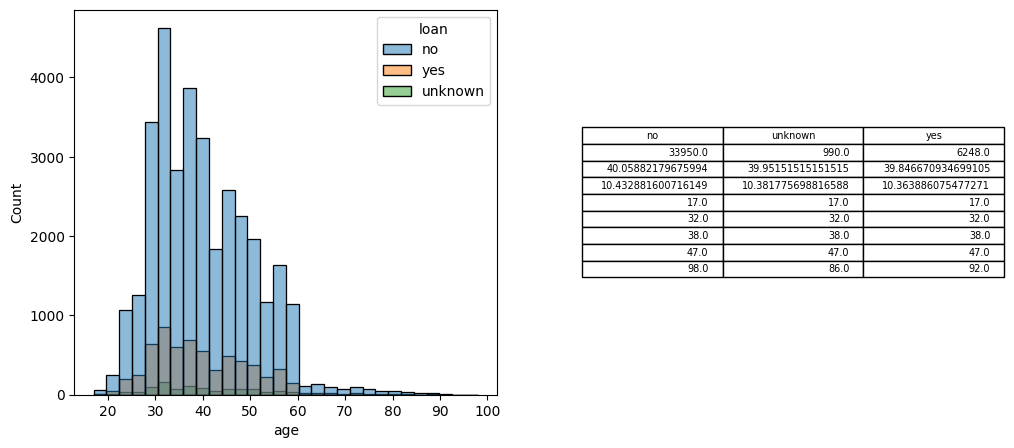

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize= (12,5))
table_data = pd.DataFrame(age_loan).reset_index().rename(columns={'index': 'Metric', 'age': 'Age'})
sns.histplot(data = bank_df, x = 'age', hue='loan', ax=ax1,bins=30)
ax2.axis('off')
ax2.table(cellText=age_loan.transpose().values, colLabels=age_loan.transpose().columns, loc='center')
plt.show()

It's possible we would want to cluster based on loan type. Not very many people have loans so maybe we would want to know more about the people that do have loans. There's no right or wrong answer here, we are just exploring the data and developing potential problems to work on more. This would all be part of the Business Understanding phase as we try to formulate a problem.

### 2.4.3: Exploring `pdays`

`pdays` are the number of days that have passed by since a customer has been contacted for a marketing campaign.

Replicate the following chart to explore `pdays`: [Lesson12_2.4.3_pdays.png](https://drive.google.com/file/d/1-V6IDxWqAZnoUZrS59MJMNfJ19u_jyO1/view?usp=sharing)
>- Don't include the customers that have never been contacted which are denoted in this column with 999 (not -1 as indicated on the webpage)



In [ ]:
bank_df.

SyntaxError: invalid syntax (<ipython-input-13-babac255d670>, line 1)

Most people have had 3-7 days pass before being contacted.

### 2.4.4: Exploring `job`

In the next cell, replicate the following chart: [Lesson12_2.4.4_jobs.png](https://drive.google.com/file/d/1-_N3AEo-ZDhSbkWNWXjwzPRfnSZ9YGHn/view?usp=sharing)

## More Exploration

We could keep going with more data exploration. If you want to continue exploring the various features in the data, add more sectios to the notebook below.

---

### Here is a quick way to show histograms using pandas plotting

>- See [pandas.DataFrame.hist doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

In [ ]:
bank_df.hist()

### Here is a correlation plot (heatmap)

>- See [seaborn Choosing Color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#diverging-color-palettes) for how you can change the color map (cmap)

# Section 3: Data Preparation

In this section we prepare the data for use in `K-means clustering`

Recall we won't have a train/test/split procedure because there is no target for this exercise. However, because `K-means` uses the distance calculation we do need to scale our data. We also need to encode our categorical features.

## In this section we will:
1. Create Dummy Variables for categorical data
2. Standardize numerical data




## 3.1: Imports

In the next cell, import the libraries for standardizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

## 3.2: Create Dummy Variables

In the next cell, create dummy variables for all the categorical data in `bank_df`. Store the results in a new DataFrame named, `X`

>- See [pandas.get_dummies doc](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
>- Note: we don't need to worry about separting a `y` feature because this is unsupervised learning



In [ ]:
X = pd.DataFrame(pd.get_dummies(bank_df))

## 3.2: Standardize `X`

In the next cell, standardize the data in the `X` DataFrame.

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Section 4: Fitting a `K-means` Clustering Model

In this section we fit a `K-means` clustering model to our `scaled_X` data.

## 4.1: Imports

In the next cell, we import the necessary modules for `K-means` clustering in `scikit-learn`.

In [ ]:
from sklearn.cluster import KMeans

## 4.2: Create the Model

In the next cell, create a `K-means` model with 2 clusters.

>- Set a random state in the model of 42, we do this so we can have reproducible results
>- Note: we choose K = 2 because this might be a good number of clusters for our problem: 1) a group we want to market to and 2) a group we don't want to market to.
>- Later, we will learn how to select K more analytically


In [ ]:
model = KMeans(n_clusters = 2, random_state = 42)

## 4.3: Create Cluster Labels

In the next cell, we will create cluster labels and store in a variable: `cluster_labels`.

There are several options we can use:

1. `model.fit()` - this will compute the k-means clustering
2. `model.fit_predict()` - this will compute cluster centers and predict cluster index for each sample
>- Note: we aren't really predicting here since this is unsupervised learning. Rather, what `fit_predict()` does for `k-means` is assign a cluster to the rows based on the iterations.

>- See [sklearn.cluster.KMeans doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more information




In [ ]:
cluster_labels = model.fit_predict(scaled_X)
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

## 4.4: Add the Cluster Labels to Original Data

Now we will add our cluster labels back to our original data so we can see how the `k-means` model clustered our customers.

In the next cell, add a column, "Cluster" based on the `cluster_labels` to the `X` dataframe.


---


In [ ]:
X['Cluster'] = cluster_labels

## 4.4: Number of Customers in Each Cluster

In the next cell, show the number of customers in each cluster.

In [ ]:
X['Cluster'].value_counts()

Cluster
1    26870
0    14318
Name: count, dtype: int64

## 4.5: Check Correlations Between Features and the Cluster Column

In the next cell, show how the "Cluster" column correlates with the other features.

>- Use the absolute values for correlations
>- Sort the results in descending order so you can see the features that are most correlated with the clusters
>- Round to 3 decimals places
>- Don't show the correlation with "Cluster" to itself

In [ ]:
corr_df = pd.DataFrame(round(np.abs(X.corr()),3))
corr_df['Cluster'].sort_values(ascending=False)

Cluster              1.000
euribor3m            0.959
emp.var.rate         0.933
nr.employed          0.886
cons.price.idx       0.679
                     ...  
loan_yes             0.003
job_management       0.002
education_unknown    0.001
default_yes          0.000
loan_no              0.000
Name: Cluster, Length: 66, dtype: float64

---
# Part 1 End
>- This marks the end of part 1 of the exercise
>- We will complete part 2 in the next class session
---
---

---
# Part 2

>- We will work on this part in the second class session related to this topic

---

# Section 5: Choosing the Value of `K` Analytically

In this section we cover methods for choosing `K` analytically.

See the [K-Means Slides - Choosing K](https://docs.google.com/presentation/d/1_18mgwT4vgjCGxAJ7qtlGpIxYDUL8yvXN70caV5RYnw/edit?usp=sharing) for more details on the process and intuition behind choosing a value of K.

---

## 5.1: Measure the Sum of Squred Distances of Points to Cluster Centers (SSD)

In this section we learn how to calculate and store SSD for various values of K. Here will be the process:

1. Define an `ssd` list variable to store various values of SSD
2. Create a for loop that will iterate through various values of `k`
>- Instantiate various `KMeans(n_clusters=k, random_state = 42)` models for each value of `k`
>- Fit the models to each value of `k`
>- Calculate and append the SSD using the `inertia_` attribute of the KMeans model. In the documenation for `KMeans`, `inertia_` is defined as the sum of squared distances of samples to their closest cluster center.
>>- Round these values to 0 decimals (whole numbers)

>- See [sklearn.cluster.KMeans doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In the next cell, write the code that will store the SSD values for values of k ranging from 2 to 9 (inclusive):

In [ ]:
ssd = []

In [ ]:
for k in range(2,10):
    model = KMeans(n_clusters=k, random_state = 42)
    model.fit(scaled_X)
    ssd.append(round(model.inertia_,0))
ssd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2469792.0,
 2370787.0,
 2271503.0,
 2203315.0,
 2170524.0,
 2113325.0,
 2073987.0,
 2026271.0]

## 5.2: Plot the values of `K` Versus the SSD Values

In the next cell, replicate the plot given here: [Lesson12_5.2_elbow.png](https://drive.google.com/file/d/1-fyk22_cI5C98G15qd9SmcpWvIeG9Wkw/view?usp=sharing)

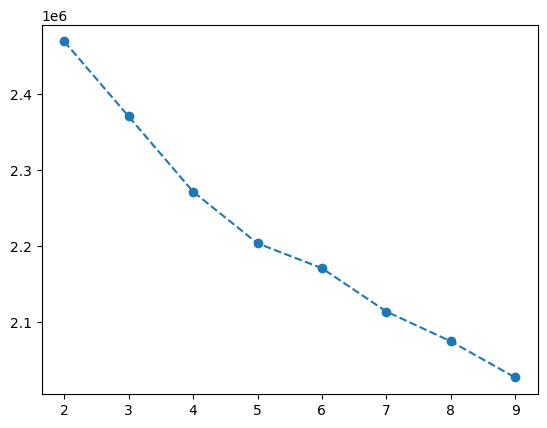

In [ ]:
fig, ax = plt.subplots()

y = ssd
x = [k for k in range(2,10)]

ax.plot(x,y,'o--')

## 5.3: Change in SSD Plot

Looking at the elbow plot can give us a good idea of where there is an "elbow" and we should consider those values of `k` for our clustering model. However, it might be useful to see the changes in SSD as `k` increases. Where we see very little change in SSD could be a `k` value to consider further.

In the next cell, replicate the following chart which shows changes in SSD over the various `k` values.

>- [Lesson12_5.3_ssdDiff.png](https://drive.google.com/file/d/1-iwiEeNSTN1AQtfjiYhX9C2fwt7h_VOg/view?usp=sharing)

In [ ]:
ssd_diff = pd.Series(ssd).diff()
ssd_diff

0        NaN
1   -99005.0
2   -99284.0
3   -68188.0
4   -32791.0
5   -57199.0
6   -39338.0
7   -47716.0
dtype: float64

<Axes: >

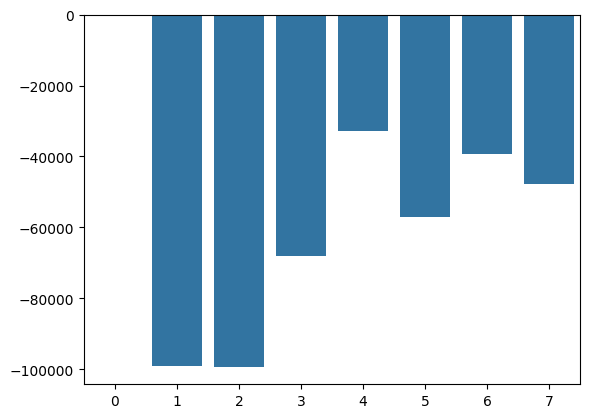

In [ ]:
fig, ax = plt.subplots()

sns.barplot(ssd_diff)

## Choosing `K` Summary

Based on the values of `K` we tested the charts in section 5.2 and 5.3 here are some things we can note:

1. A `K` value of 5 might be a good value to use for clustering. This is because we see in the elbow chart a "flattening" out occur between K = 5 and K = 6. We also see this in the SSD difference bar chart with a low difference at the K - 1 value of 4 (which is K = 5).
2. A `K` Value of 7 might also be a good choice for clustering for the same reasons given in (1).




# Section 6: Final `K-means` Model

In this section we use what we learned throughout the notebook to produce our final `K-means` model.

## 6.1: Kmeans with K = 5

In the next cell, instantiate a `Kmeans` Model named, `model_5` with:
>- `K = 5`
>- `random_state = 42`

In [ ]:
model_5 = KMeans(n_clusters=5, random_state = 42)

## 6.2: Create Cluster Labels

In the next cell, create cluster labels for the 5 cluster model.
>- Store the results in a variable: cluster_labels_5

In [ ]:
cluster_labels_5 = model_5.fit_predict(scaled_X)
cluster_labels_5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 2, 2, 4], dtype=int32)

## 6.3: Add `cluster_labels_5` To the Original Data

Now we will add our cluster labels back to our original data so we can see how the `model_5` model clustered our customers.

In the next cell, add a column, "Cluster_5" based on the `cluster_labels_5` to the `X` dataframe.


In [ ]:
X['Cluster_5'] = cluster_labels_5

## 6.4: Number of Customers in Each Cluster

In the next cell, show the number of customers in each of the 5 clusters.

In [ ]:
X['Cluster_5'].value_counts()

Cluster_5
0    13253
3    13037
2     8422
4     5486
1      990
Name: count, dtype: int64

## 6.5: Review Some Cases

In the next cell, show 10 examples (cases) for each cluster in a DataFrame named, `samples`.

>- Can you determine what the cluster might mean, if anything?

In [ ]:
samples = X.groupby('Cluster_5', group_keys=True).apply(lambda x: x.sample(10, random_state=42))

samples

age  duration  campaign  pdays  previous  emp.var.rate  \
Cluster_5                                                                 
0         13202   32       147         1    999         0           1.4   
          17067   32       212         2    999         0           1.4   
          23852   42        81         7    999         0           1.4   
          18201   30        72         7    999         0           1.4   
          26823   46       108         2    999         0          -0.1   
          19270   32       211         2    999         0           1.4   
          15628   26       489         3    999         0           1.4   
          12761   38       175         1    999         0           1.4   
          20876   32       109         1    999         0           1.4   
          19159   52       425         2    999         0           1.4   
1         7475    52       854         2    999         0           1.1   
          11170   42        59         3    999         0           1.4   
          18615   45       151        10    999         0           1.4   
          10613   32       120         1    999         0           1.4   
          2723    45       179         1    999         0           1.1   
          20622   51       332         1    999         0           1.4   
          9522    56       356         5    999         0           1.4   
          3342    51        89         1    999         0           1.1   
          2124    30       386         2    999         0           1.1   
          19278   31       122         1    999         0           1.4   
2         31081   37       372         1    999         0          -1.8   
          27713   70       187         3    999         0          -1.8   
          36350   33       690         1    999         0          -2.9   
          37372   59       163         3    999         0          -2.9   
          40824   25       732         1    999         0          -1.1   
          38223   41       173         2    999         0          -3.4   
          31962   46       293         2    999         0          -1.8   
          33138   40       271         1    999         0          -1.8   
          35033   28       386         1    999         0          -1.8   
          33465   48        53         9    999         0          -1.8   
3         837     41       112         1    999         0           1.1   
          8352    42       215         3    999         0           1.4   
          12283   43       155         3    999         0           1.4   
          10647   38       291         1    999         0           1.4   
          15689   37        37         1    999         0           1.4   
          2683    45        72         2    999         0           1.1   
          1415    54       200         2    999         0           1.1   
          2998    35       427         1    999         0           1.1   
          1526    35        49         4    999         0           1.1   
          11020   38      1066         9    999         0           1.4   
4         30710   41       234         1    999         2          -1.8   
          24279   42        94         1      4         1          -0.1   
          24139   44       130         1    999         1          -0.1   
          37877   53        81         1    999         2          -2.9   
          28509   31       424         2    999         2          -1.8   
          38163   49        56         1    999         2          -3.4   
          40044   30       212         1      3         2          -1.7   
          41150   41       371         2    999         1          -1.1   
          31168   31       188         1    999         1          -1.8   
          37358   56        97         1      3         2          -2.9   

                 cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
Cluster_5                            

In [ ]:
X.loc[[18151,5302,33337], ['age','Cluster_5']]

,age,Cluster_5
18151,57,0
5302,54,1
33337,32,4


It might help to review the correlations of `Cluster_5` to the other features, sort, and show the top 5-10 featurs based on correlation.

Now use the top 5 correlated features to show a smaller DataFrame. This might help us see any differences between clusters.

# Section 7: Using Supervised Learning to Generate Cluster Descriptions

In this section we use Decision Trees to help us automatically generate cluster descriptions. In this section we will:

1. Import the `DecisionTreeClassifier` and `plot_tree`
2. Fit a decision tree model to the `X` data
3. Examine feature importances based on the clusters
4. Display a decision tree
5. Use the feature importances and decision tree to generate cluster descriptions

Note: while other predictive models could be used here, the most important thing for this project is *intelligibility* and decision trees are great for this purpose. Remember, we are still not trying to predict anything, rather we are focused on trying to explain our clusters. So the focus is not on optimal predictive ability but on interpretability of the clusters.

>- Resource: see `Chapter 6` in the DS4B book by Provost & Fawcett under the section "Using Supervised Learning to Generate Cluster Descriptions" for a discussion about the process we will take in this section.

---

## 7.1: Imports

In the next cell, import the modules necessary to create a decision tree and plot it. Refer back to the notes on decision trees (Tech Lesson 04) if you need to.



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 7.2: In this Section we define the data for each cluster

For a complete analysis, we will ultimately want to build decision trees for each cluster to help us understand how to segment them.

One way to analyze one cluster at a time is to create a column that flags (one-hot encodes) whether an example belongs to the cluster or not. Then we can create a decision tree to model the features that segment the cases into the cluster or not.

For this exercise, we will complete the analysis for one of the clusters, cluster 0. For extra practice you could continue and model for each cluster.

---



### 7.2.1: In the next cell(s) define the data for each cluster:

In the next cell(s), define the columns that will flag if an example belongs to a particular cluster or not.

To help keep track of each column, give them names relevant to each cluster.
>- One way to quickly create one-hot encoded columns for each cluster is to use `pd.get_dummies()` then append the result back to the dataframe.
>- Start by defining a new DataFrame, `tree_df`, that uses all the data from the `X` Dataframe we created earlier (Section 3.2) but drops the "Cluster" column


Define the `tree_df` DataFrame in the next cell.

In [ ]:
tree_df = X.drop(['Cluster'], axis = 1)

In [ ]:
clusters = pd.get_dummies(tree_df['Cluster_5'])

clusters.rename({0: "cluster_0",
                 1: "cluster_1",
                 2: "cluster_2",
                 3: "cluster_3",
                 4: "cluster_4"},
                axis = 1,
                inplace = True)

clusters

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
41183,False,False,True,False,False
41184,False,False,True,False,False
41185,False,False,True,False,False
41186,False,False,True,False,False


### 7.2.2: Append Cluster Columns Back to `tree_df` DataFrame

In the next cell, append your encoded columns for each cluster back to the `tree_df` DataFrame.

>- Once this is complete you can analyze any of the clusters using a tree model

In [ ]:
tree_df = pd.concat([tree_df, clusters], axis = 1)

tree_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster_5,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,True,False,3,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,True,False,3,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,True,False,3,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,True,False,3,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,True,False,3,False,False,False,True,False


## 7.3: Define Data for One Cluster

Now that we have encoded columns representing each cluster, let's focus on anlayzing one of them. For now, let's just analyze the first cluster, `0`.

In the next cell, define the `X_0` and `y_0` data for fitting a tree model to the `0` cluster. Don't forget to exlude the extra cluster columns from your `X_0` DataFrame.



In [ ]:
X_0 = tree_df.iloc[:,:67].drop('Cluster_5', axis = 1)

X_0 = X_0.drop('cluster_0', axis = 1)

y_0 = tree_df['cluster_0']
X_0.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False


## 7.4: Fit the Model

In the next cell, fit a decision tree classifier to the tree data defined in `7.3`. Use the following parameters:

>- `random_state = 42`
>- Name the model, `tree_0`

In [ ]:
tree_0 = DecisionTreeClassifier(random_state= 42)

tree_0.fit(X_0, y_0)

DecisionTreeClassifier(random_state=42)

## 7.5: Feature Importances

In the next cell, create a `feature_importances_df` DataFrame based on the `tree_0` model.

>- Round the importance values to 3 decimals and enter the values in `0.XXX` format
>- Sort the dataframe so you see the most important features first


In [ ]:
importance_df = round(pd.DataFrame(index = X_0.columns, data = tree_0.feature_importances_,
                             columns = ['Importances']).sort_values(by = 'Importances', ascending = False), 3)

importance_df

,Importances
nr.employed,0.507
contact_cellular,0.371
previous,0.070
housing_unknown,0.029
cons.price.idx,0.005
...,...
default_yes,0.000
emp.var.rate,0.000
pdays,0.000
loan_unknown,0.000


## 7.5: Top 10 Features

In the next cell, show the top 10 features based on importance.

In [ ]:
importance_df.head(10)

,Importances
nr.employed,0.507
contact_cellular,0.371
previous,0.070
housing_unknown,0.029
cons.price.idx,0.005
housing_yes,0.003
education_university.degree,0.003
marital_single,0.002
duration,0.002
age,0.001


## 7.6: Visualze the Decision Tree

In the next cell, show a visualization of the `tree_0` model.

Some parameters to adjust if you have trouble seeing the results of the tree:

1. Change the figure size
2. Change the `max_depth` parameter in `plot_tree()`
3. Change the `fontsize` parameter in `plot_tree()`

Below is a sample tree you could try to replicate but this is not meant to be the "best" tree diagram you could produce:

>- [Lesson 12 7.6 Tree Example](https://drive.google.com/file/d/1kSJkCpjl8xRjSKxZDqScCuf0DszpoZ0n/view?usp=sharing)



## 7.7: View the Text Output of the Decision Tree

Sometimes it could be useful to look at the text output of the tree. In the next cell, show the text report showing the rules of the `tree_0` model.

>- Check [sklearn.tree.export_text doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text) for help on this

## 7.8: Cluster 0 Analysis

After going through the steps of this section. Try to summarize what Cluster 0 represents. Remember, there really aren't any right or wrong answers when we are doing unsupervised learning, and no matter what the analytical approaches indicate, we still need to consult some content experts to see if the cluster descriptions can be useful.

Summarize Cluster 0 Below

---
Some observation notes:

Cluster 0 could be summarized by...:



----